In [6]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/corpus_images'

Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [10]:
#Crear lista para almacenar datos de imagenes
directorio = {'Imagen':[], 'Caracteristicas':[], 'Rostro':[], 'Etiqueta': []}

for nombre_carpeta in os.listdir(ruta_carpeta_inicial):
    ruta_carpeta = os.path.join(ruta_carpeta_inicial, nombre_carpeta)
    if os.path.isdir(ruta_carpeta):
        for nombre_archivo in os.listdir(ruta_carpeta):
            try:
                ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
                imagen_BGR = cv2.imread(ruta_archivo)

                imagen_RGB = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2RGB)

                imagen_redimensionada = cv2.resize(imagen_RGB,(150,150))

                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                arriba,derecha,abajo,izquierda = face_recognition.face_locations(imagen_redimensionada)[0]

                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]

                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Caracteristicas'].append(caracteristicas_faciales)
                directorio['Rostro'].append(cara_recortada)
                directorio['Etiqueta'].append(nombre_carpeta)
                

            except Exception as e:
                print("Error en archivo:"+str(nombre_archivo)+":"+str(e))

Error en archivo:identificador_5772_2016-12-05_14-31-53.jpeg:list index out of range
Error en archivo:identificador_994_2016-11-09_14-05-26.jpeg:list index out of range
Error en archivo:identificador_5867_2016-12-05_15-02-28.jpeg:list index out of range
Error en archivo:identificador_993_2016-11-09_14-05-22.jpeg:list index out of range
Error en archivo:250.jpeg:list index out of range
Error en archivo:243.jpeg:list index out of range
Error en archivo:255.jpeg:list index out of range
Error en archivo:239.jpeg:list index out of range
Error en archivo:228.jpeg:list index out of range
Error en archivo:242.jpeg:list index out of range
Error en archivo:234.jpeg:list index out of range
Error en archivo:241.jpeg:list index out of range
Error en archivo:230.jpeg:list index out of range
Error en archivo:240.jpeg:list index out of range
Error en archivo:256.jpeg:list index out of range
Error en archivo:251.jpeg:list index out of range
Error en archivo:226.jpeg:list index out of range


Creamos el Dataset en formato Pandas

In [11]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)

In [12]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[168, 186, 191], [168, 186, 190], [168, 186,...","[{'chin': [(60, 69), (60, 74), (61, 80), (62, ...","[[[24, 27, 34], [24, 25, 27], [32, 33, 35], [2...",focused
1,"[[[155, 169, 169], [155, 169, 169], [156, 170,...","[{'chin': [(55, 59), (55, 65), (56, 72), (57, ...","[[[155, 169, 170], [9, 18, 23], [7, 8, 9], [45...",focused
2,"[[[156, 165, 164], [157, 166, 165], [156, 165,...","[{'chin': [(56, 74), (56, 81), (58, 88), (59, ...","[[[17, 17, 19], [18, 18, 21], [15, 15, 15], [2...",focused
3,"[[[157, 171, 171], [159, 171, 171], [157, 171,...","[{'chin': [(59, 83), (59, 90), (59, 97), (60, ...","[[[163, 177, 180], [140, 152, 155], [12, 17, 2...",focused
4,"[[[161, 175, 176], [159, 173, 173], [160, 174,...","[{'chin': [(50, 66), (50, 73), (50, 80), (51, ...","[[[161, 174, 180], [161, 174, 178], [160, 174,...",focused


Tranformamos de directorios a Numpy la columna de caracteristicas

In [13]:
def extraer_caracteristicas_faciales(lista_caracteristicas_faciales):
    caracteristicas_array = []
    for caracteristica in lista_caracteristicas_faciales:
        puntos_referencia = []
        for rasgo_facial in caracteristica.keys():
            puntos_referencia.extend(caracteristica[rasgo_facial])
        caracteristicas_array.append(puntos_referencia)
    return np.array(caracteristicas_array)

df['Caracteristicas'] = df['Caracteristicas'].apply(extraer_caracteristicas_faciales)

In [14]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[168, 186, 191], [168, 186, 190], [168, 186,...","[[[60, 69], [60, 74], [61, 80], [62, 86], [64,...","[[[24, 27, 34], [24, 25, 27], [32, 33, 35], [2...",focused
1,"[[[155, 169, 169], [155, 169, 169], [156, 170,...","[[[55, 59], [55, 65], [56, 72], [57, 78], [59,...","[[[155, 169, 170], [9, 18, 23], [7, 8, 9], [45...",focused
2,"[[[156, 165, 164], [157, 166, 165], [156, 165,...","[[[56, 74], [56, 81], [58, 88], [59, 96], [61,...","[[[17, 17, 19], [18, 18, 21], [15, 15, 15], [2...",focused
3,"[[[157, 171, 171], [159, 171, 171], [157, 171,...","[[[59, 83], [59, 90], [59, 97], [60, 104], [62...","[[[163, 177, 180], [140, 152, 155], [12, 17, 2...",focused
4,"[[[161, 175, 176], [159, 173, 173], [160, 174,...","[[[50, 66], [50, 73], [50, 80], [51, 87], [53,...","[[[161, 174, 180], [161, 174, 178], [160, 174,...",focused


Vemos los formatos en los cuales está el Dataset

In [15]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(150, 150, 3)
(1, 72, 2)
(52, 51, 3)


Guardar el dataset

In [16]:
#df.to_hdf('BD_Emotions_color', key='dataframe', mode = 'w')

/tmp/ipykernel_4404/2059923752.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_color', key='dataframe', mode = 'w')


Leer archivo creado

In [2]:
import pandas as pd
df_HDF = pd.read_hdf('BD_Emotions_color')

In [3]:
print(df_HDF.shape[1])

4


In [4]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[168, 186, 191], [168, 186, 190], [168, 186,...","[[[60, 69], [60, 74], [61, 80], [62, 86], [64,...","[[[24, 27, 34], [24, 25, 27], [32, 33, 35], [2...",focused
1,"[[[155, 169, 169], [155, 169, 169], [156, 170,...","[[[55, 59], [55, 65], [56, 72], [57, 78], [59,...","[[[155, 169, 170], [9, 18, 23], [7, 8, 9], [45...",focused
2,"[[[156, 165, 164], [157, 166, 165], [156, 165,...","[[[56, 74], [56, 81], [58, 88], [59, 96], [61,...","[[[17, 17, 19], [18, 18, 21], [15, 15, 15], [2...",focused
3,"[[[157, 171, 171], [159, 171, 171], [157, 171,...","[[[59, 83], [59, 90], [59, 97], [60, 104], [62...","[[[163, 177, 180], [140, 152, 155], [12, 17, 2...",focused
4,"[[[161, 175, 176], [159, 173, 173], [160, 174,...","[[[50, 66], [50, 73], [50, 80], [51, 87], [53,...","[[[161, 174, 180], [161, 174, 178], [160, 174,...",focused


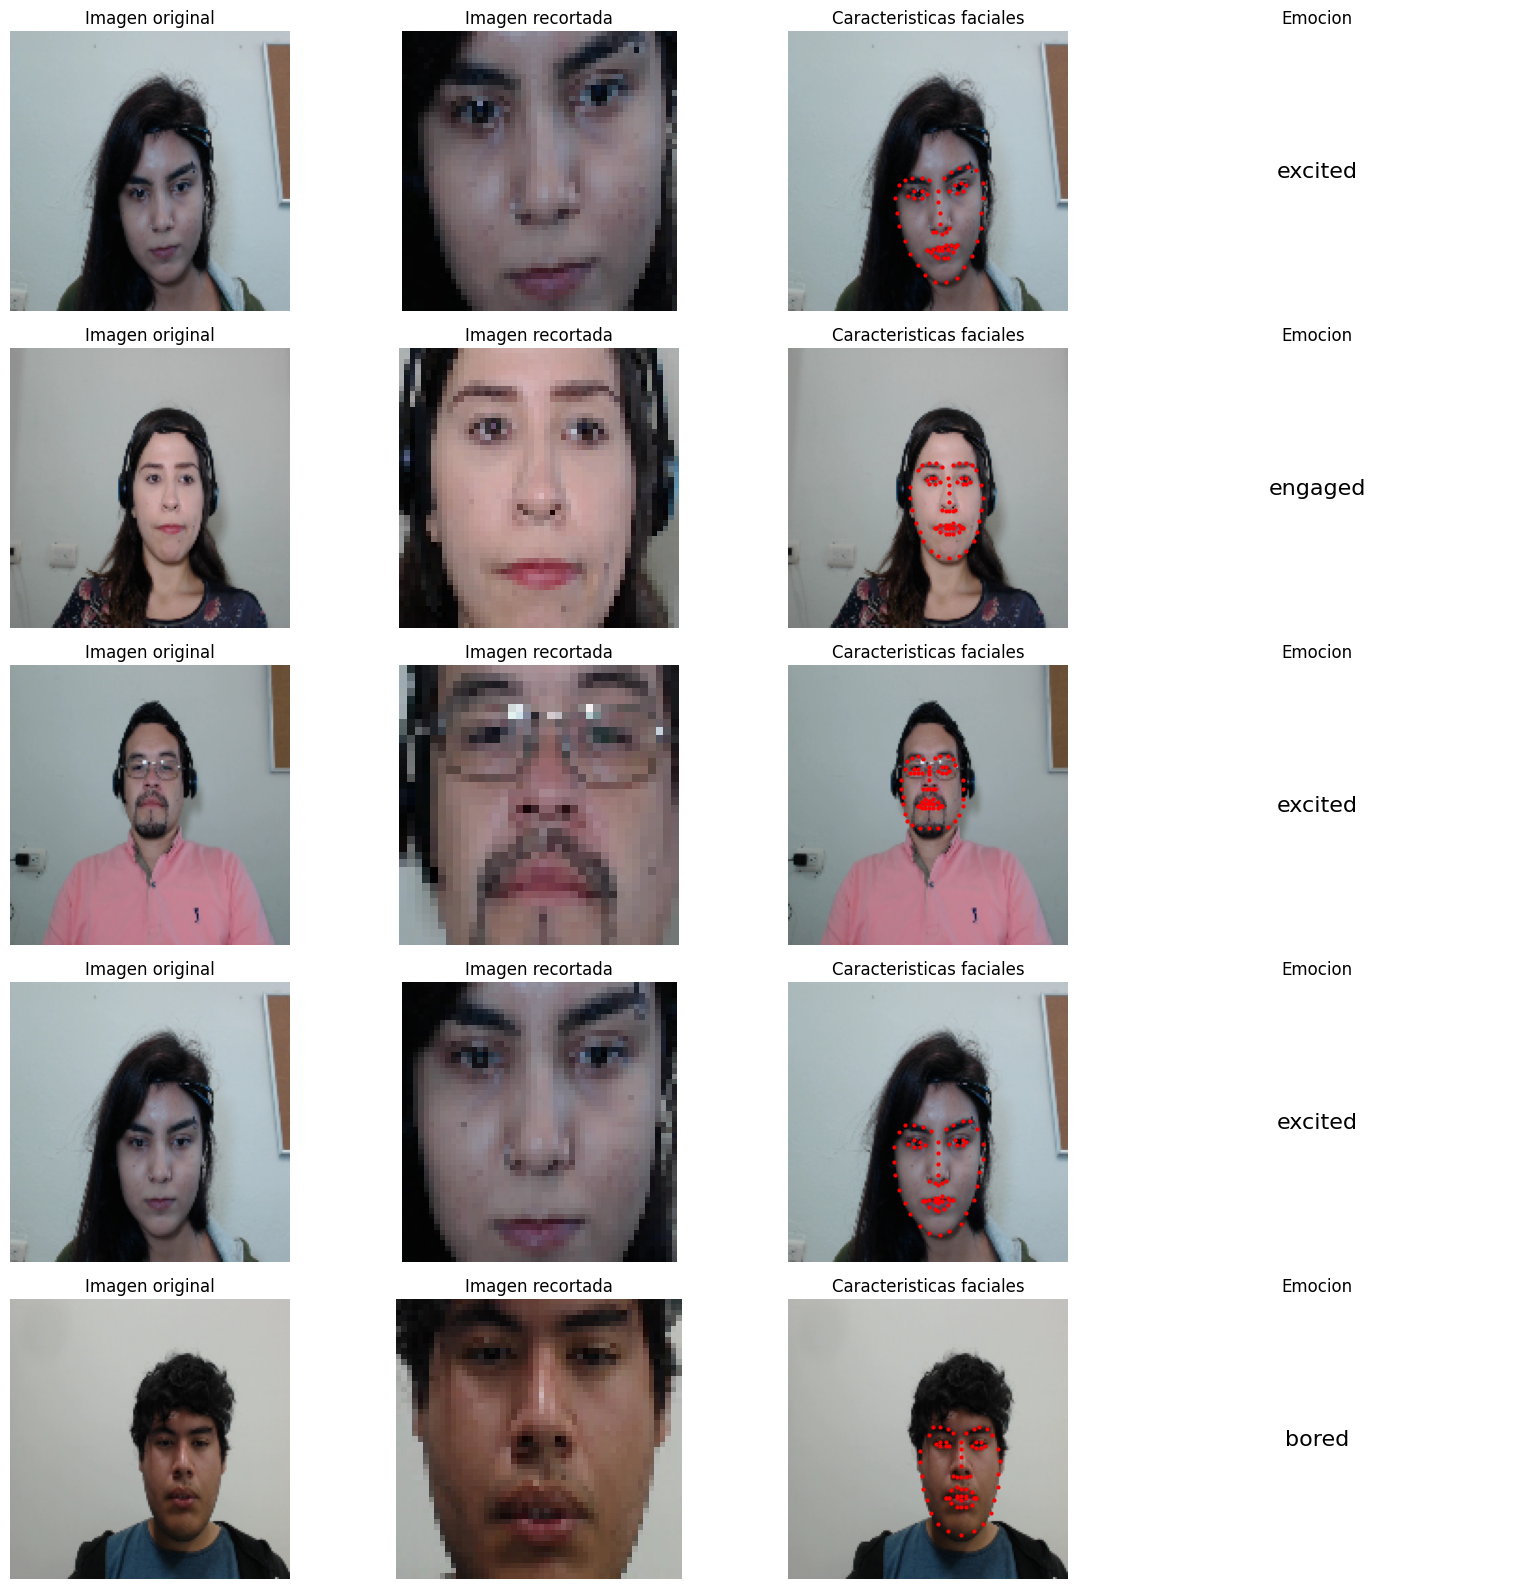

In [18]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')

    ax1 = axes[i,1]
    ax1.imshow(row['Rostro'])
    ax1.set_title('Imagen recortada')
    ax1.axis('off')

    ax2 = axes[i,2]
    ax2.imshow(row['Imagen'])

    for caracteristicas in row['Caracteristicas']:
        for caracteristica in caracteristicas:
            ax2.plot(caracteristica[0], caracteristica[1], marker= 'o', markersize = 2, color='red')

    ax2.set_title('Caracteristicas faciales')
    ax2.axis('off')

    ax3 = axes[i,3]

    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax3.set_title('Emocion')
    ax3.axis('off')
plt.tight_layout()
plt.show()
    
    
    